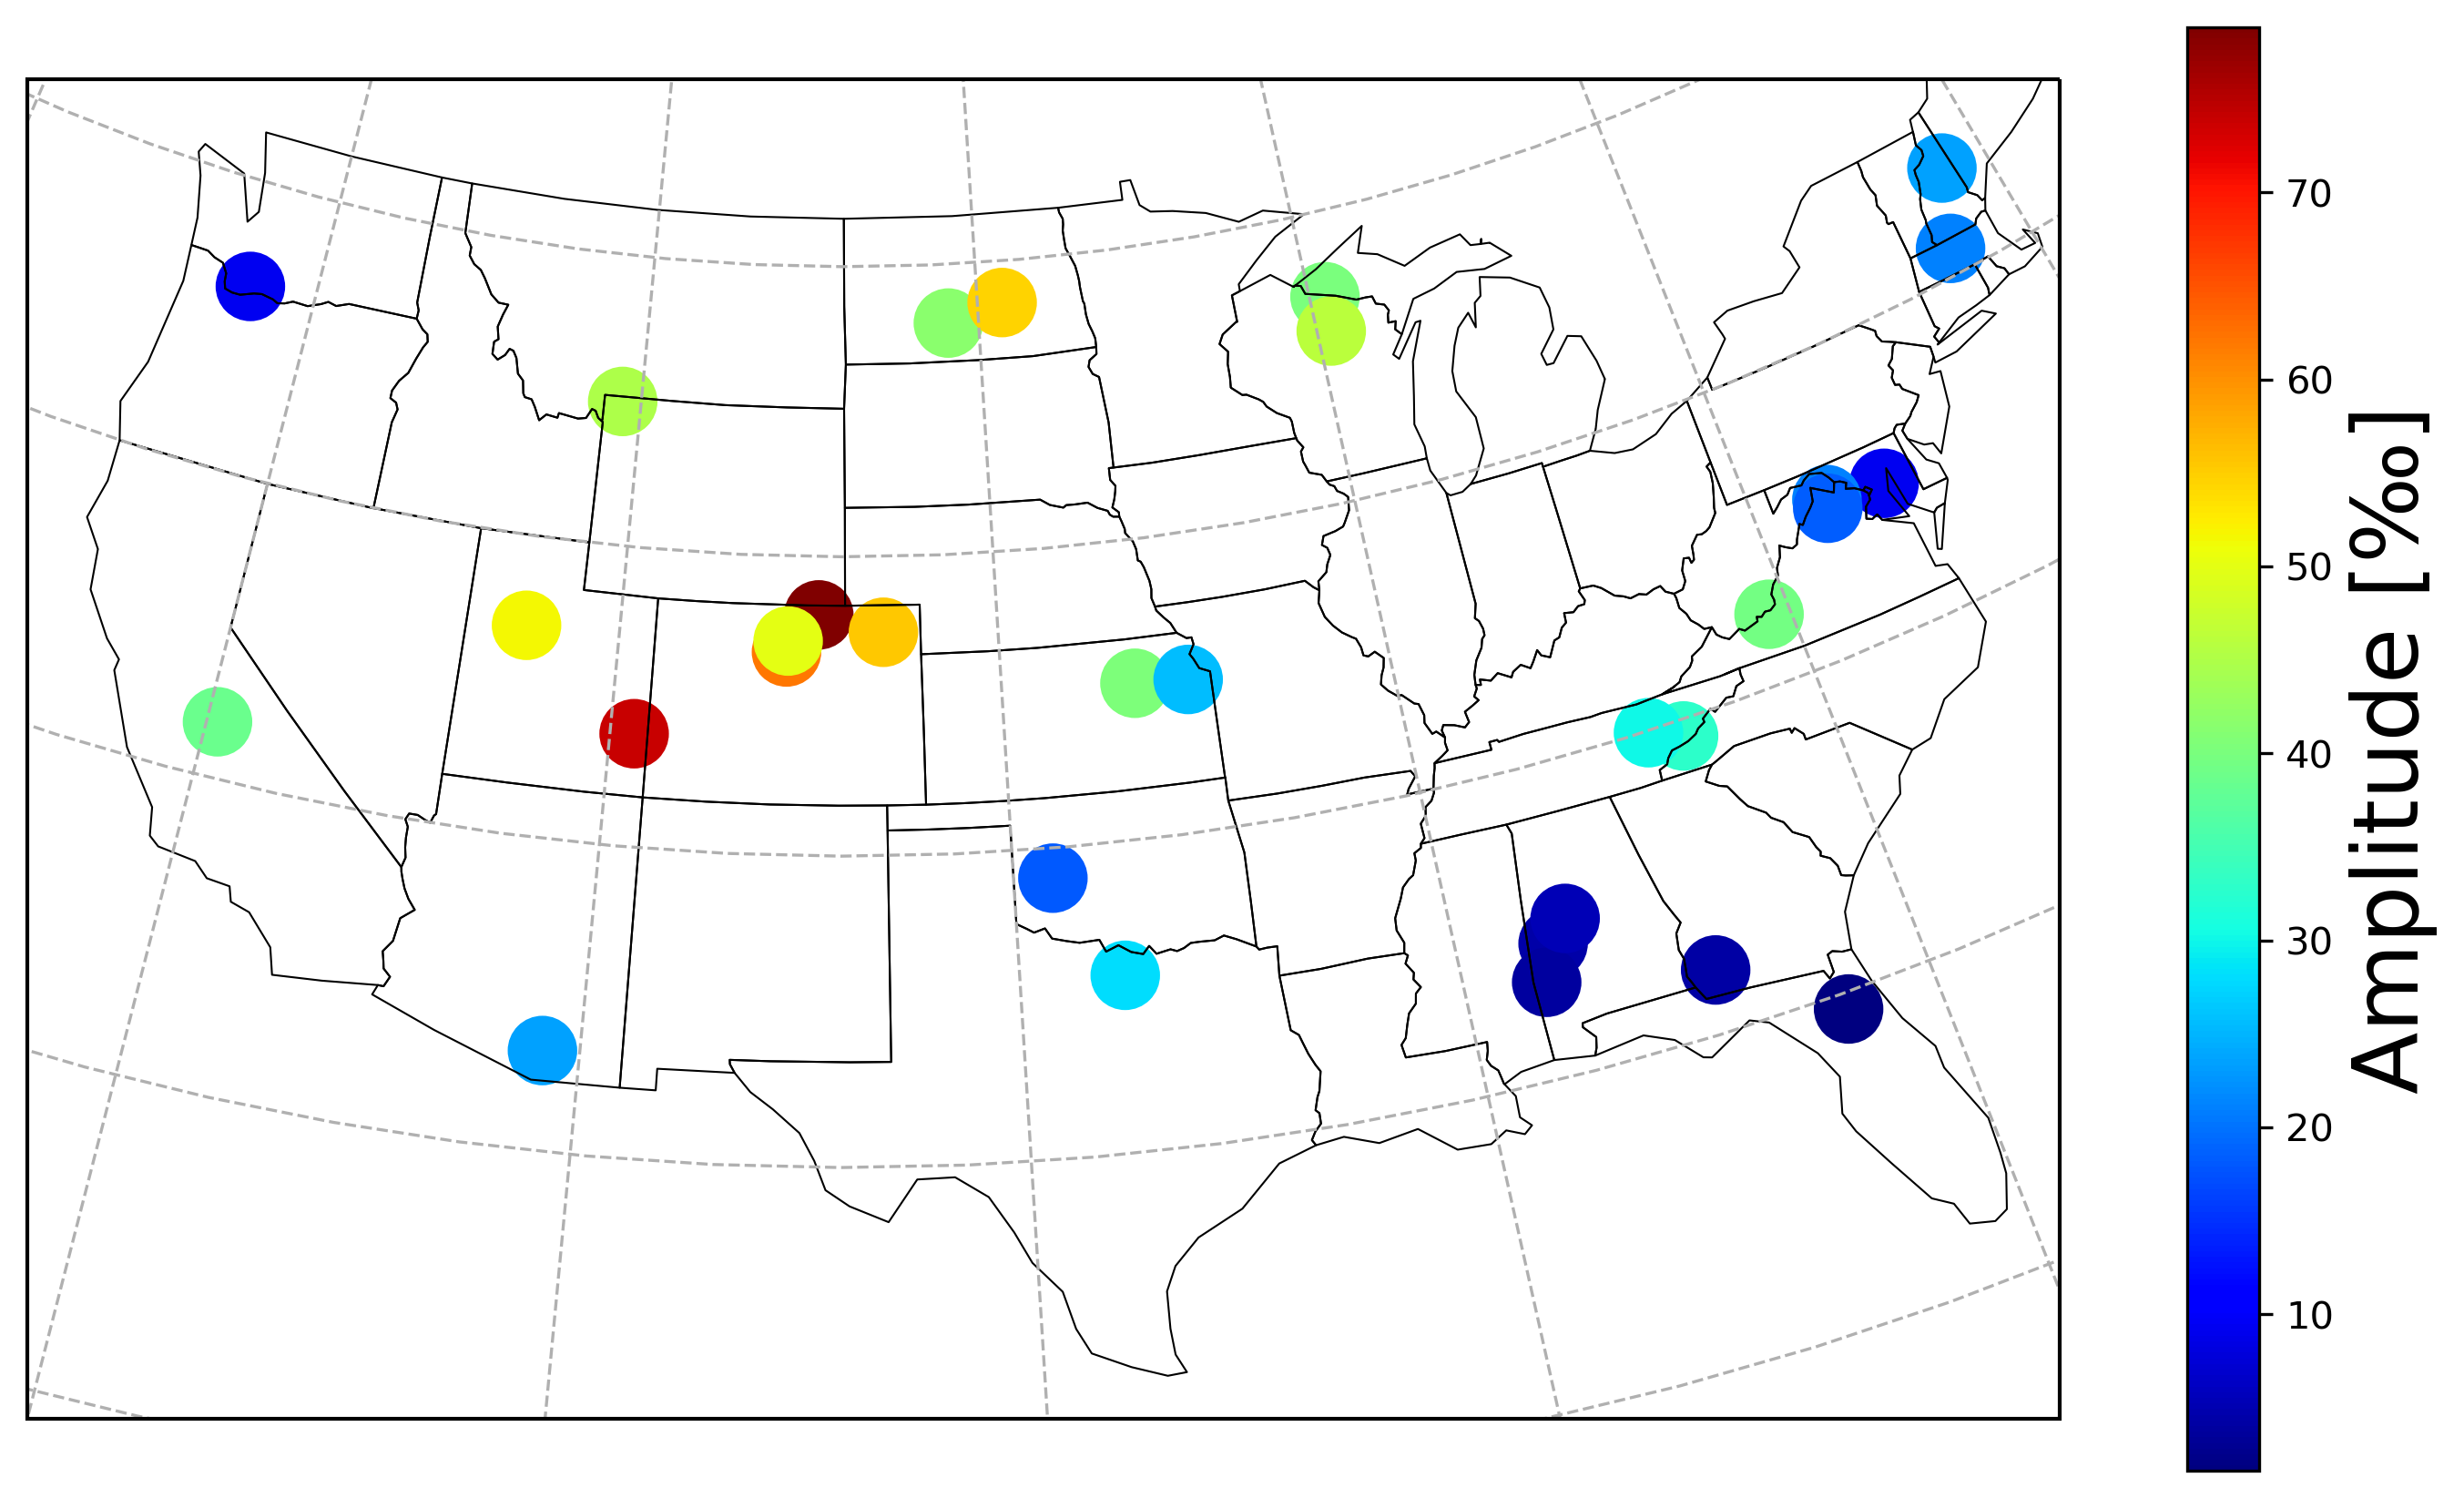

In [31]:
## Python Import Statements
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import os

ROOTDIR = os.getcwd() # Home directory
CODEDIR = ROOTDIR + '/CODE/' # Code directory
DATADIR = ROOTDIR + '/DATA/' # Data directory

plt.rcParams["figure.dpi"] = 300

'''Try to run the code below first, 
    which should give you a map for CNUS'''

canada_east = -80
canada_west = -120
canada_north = 49
canada_south = 23.5

standard_parallels = (49, 77)
central_longitude = -104 

plt.figure(1,figsize = (12,7))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
'''The code right below is to generate the bounding box '''

ax.set_extent([canada_west, canada_east, canada_south, canada_north],ccrs.Geodetic())
#ax.stock_img(alpha=0.2)
ax.gridlines(linestyle='--')


df_summary = pd.read_csv(ROOTDIR+'/FIGURES/'+'Site_Summary_Table.csv')
lat = df_summary['Latitude']
long = df_summary['Longitude']
amp = df_summary['Amplitude']
mean = df_summary['d18O Mean']
std = df_summary['d18O Std']
correlation = df_summary['Correlation']

ax.add_feature(cfeature.STATES, linewidth = 0.5) ####state boundaries

plt.scatter(long, lat, alpha=1, s=300,
           c=amp,
            cmap=plt.get_cmap("jet"), 
            transform=ccrs.PlateCarree())

cbar = plt.colorbar()
#cbar.set_label("Pearson Correlation Coefficient", fontsize=24)
cbar.set_label("Amplitude [‰]", fontsize=24)


plt.savefig(ROOTDIR+'/FIGURES/'+'Amplitude', transparent=True)